<a href="https://colab.research.google.com/github/edsonajunior/Data-Science-study/blob/master/QuarentenaDados_aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 02

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
# filmes é um DataFrame
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe()

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

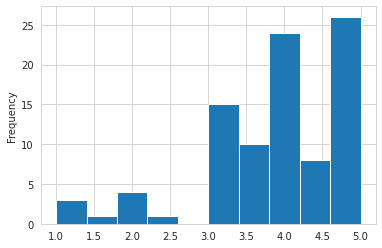

In [0]:
#Mágico de Oz
plot_filme(919)



A função plot, além de gerar o histograma também retorna algumas estatísticas. Vamos chamar a função agora para o filme *Little Miss Sunshine*.

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

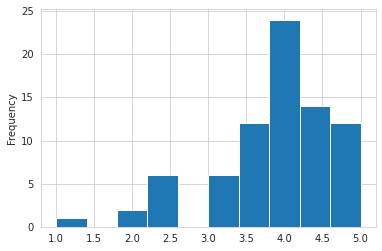

In [0]:
plot_filme(46578)

Ótimo, agora com essas informações conseguimos comparar melhor ambos os filmes. Analisando os histogramas vemos que muitas pessoas realmente amam **Wizard of Oz** (notas 5), mas também temos pessoas que não gostam de formal alguma (notas 1). Quando comparamos com a histograma temos um do **Little mis sunshine**, percebemos que os resultados se concentra entre valores medianos(notas 2.5-4). 

O que confirma nossa análise aqui é comparar os **25% 50% e 75%**. 50% é o valor da mediana, e ambos filmes tem mesma mediana, mas 25% e 75% são diferentes. Se você lembra lá da estatísitca esses são os [**1° 2° e 3° quartis**](https://pt.wikipedia.org/wiki/Quartil). 

Olha, mesclar os gráficos com as estatísticas ajuda a interpretar melhor os dados. Mas o que precisamos é uma imagem que nos ajude a interpretar os dados ainda melhor, o gráfico que nos ajuda neste caso é o **Boxplot**. Vamos adaptar nossa função para conseguir plotar o boxplot e interpretá-lo.

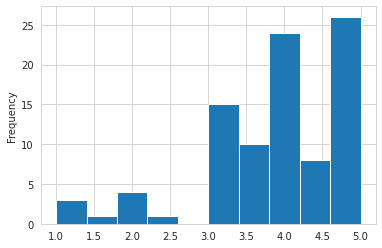

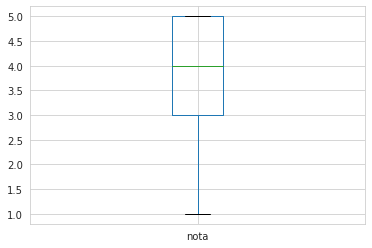

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

plot_filme(919)

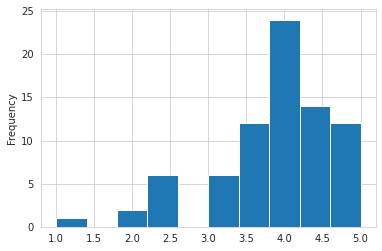

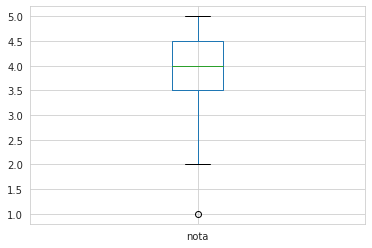

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [0]:
plot_filme(46578)

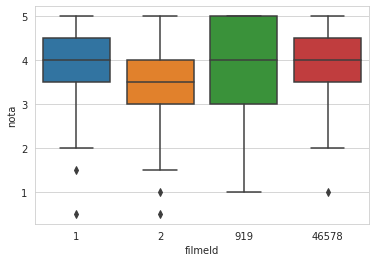

In [0]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota")

##Desafio 1

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

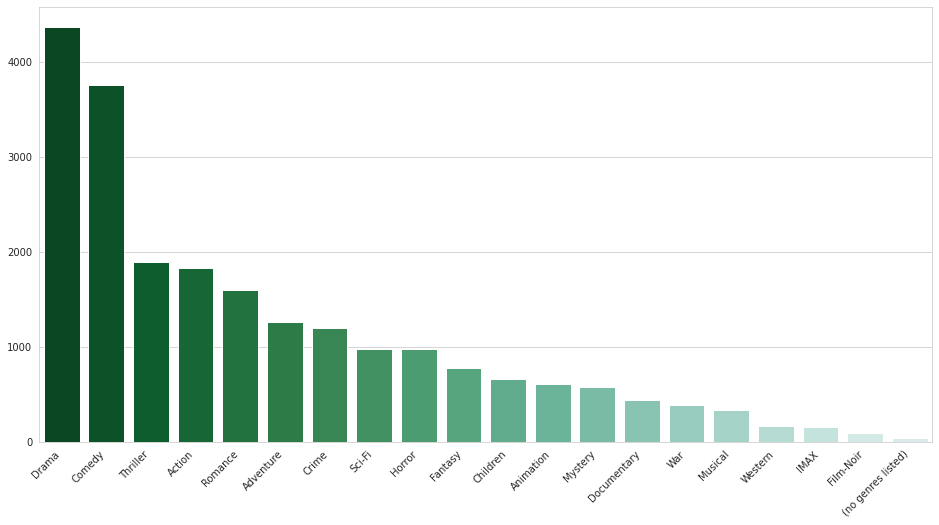

In [0]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
chart = sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## Desafio 2

Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

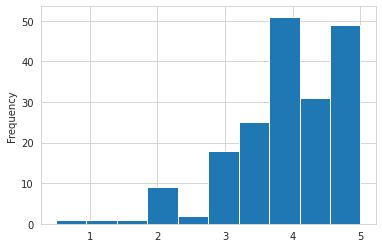

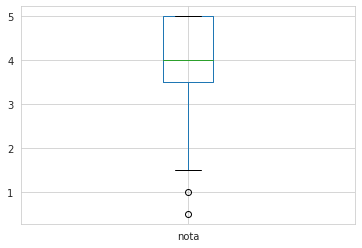

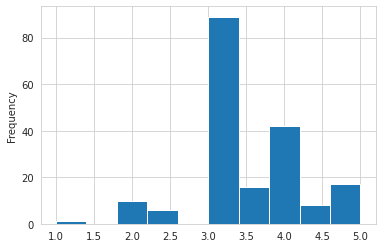

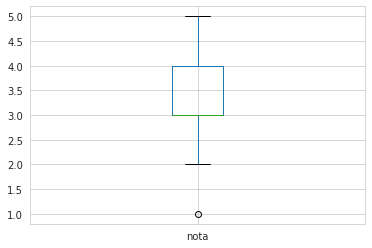

count    189.000000
mean       3.428571
std        0.774548
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

In [0]:
avaliacao_mesma_nota_count = avaliacoes.groupby('filmeId')['nota'].count()
filmes_com_media_com_count = filmes_com_media.join(avaliacao_mesma_nota_count, on="filmeId" , how='left', lsuffix='_media', rsuffix='_count')
filmes_com_media_com_count = filmes_com_media_com_count.rename(columns={"nota_media": "nota", "nota_count": "count"})
filmes_filtrados = filmes_com_media_com_count.query("count>150 and count<200").sort_values("nota", ascending=False)

def plot_filme(n):
  grafico = avaliacoes.query(f"filmeId=={n}")["nota"]
  grafico.plot(kind='hist')
  plt.show()
  print('\n')
  grafico.plot.box()
  plt.show()
  return grafico.describe()

plot_filme(5952)
plot_filme(592)

# Filmes escolhidos 592 e 5952


## Desafio 3

 Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [0]:
# top 10 filmes mais votados
filmes_com_media_com_count.sort_values("count", ascending=False).head(10)

,filmeId,titulo,generos,nota,count
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.750000,238.0
97,110,Braveheart (1995),Action|Drama|War,4.031646,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.970982,224.0
461,527,Schindler's List (1993),Drama|War,4.225000,220.0


## Desafio 4 

Configurar a visualização do boxplot gerado pelo seaborn e configurar o tamanho e colocar o nome dos filmes nos thicks.

[Text(0, 0, 'Toy Story (1995)'),
 Text(0, 0, 'Jumanji (1995)'),
 Text(0, 0, 'Wizard of Oz, The (1939)'),
 Text(0, 0, 'Little Miss Sunshine (2006)')]

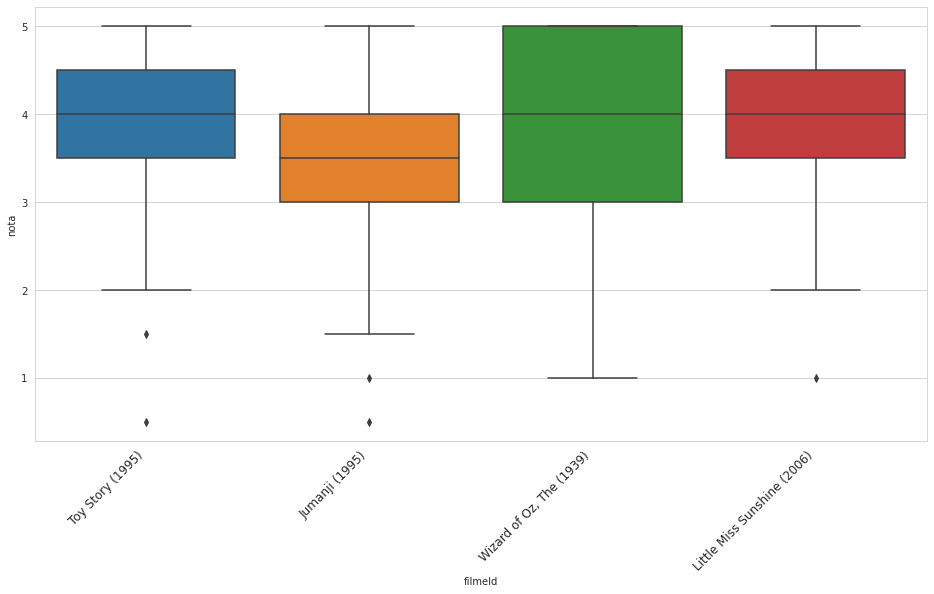

In [0]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x="filmeId", y="nota")
ax.set_xticklabels(filmes.query("filmeId in [1,2,919,46578]")['titulo'], fontsize=12, rotation=45, horizontalalignment='right')

## Desafio 5 
Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [0]:
# calculando a moda/media/mediana
filmes_mediana = avaliacoes.groupby("filmeId")["nota"].median()
filmes_media = avaliacoes.groupby("filmeId")["nota"].mean()
filmes_moda = avaliacoes.groupby(by="filmeId")["nota"].agg(lambda x:x.value_counts().index[0])
# atribuindo a mediana a tabela
filmes_moda_media_mediana = filmes.join(filmes_mediana,on="filmeId")
filmes_moda_media_mediana = filmes_moda_media_mediana.rename(columns={'nota': 'média'})
# atribuindo a media a tabela
filmes_moda_media_mediana = filmes_moda_media_mediana.join(filmes_media,on="filmeId")
filmes_moda_media_mediana = filmes_moda_media_mediana.rename(columns={'nota': 'mediana'})
# atribuindo a moda a tabela
filmes_moda_media_mediana = filmes_moda_media_mediana.join(filmes_moda,on="filmeId")
filmes_moda_media_mediana = filmes_moda_media_mediana.rename(columns={'nota': 'moda'})
# resultado e mediana arredondada com 2 decimais
filmes_moda_media_mediana.round({'mediana': 2}).head(10)

,filmeId,titulo,generos,média,mediana,moda
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,3.92,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.5,3.43,4.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.0,3.26,3.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3.0,2.36,3.0
4,5,Father of the Bride Part II (1995),Comedy,3.0,3.07,3.0
5,6,Heat (1995),Action|Crime|Thriller,4.0,3.95,4.0
6,7,Sabrina (1995),Comedy|Romance,3.0,3.19,3.0
7,8,Tom and Huck (1995),Adventure|Children,3.0,2.88,3.0
8,9,Sudden Death (1995),Action,3.0,3.12,3.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.5,3.50,3.0


## Desafio 6

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).


count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

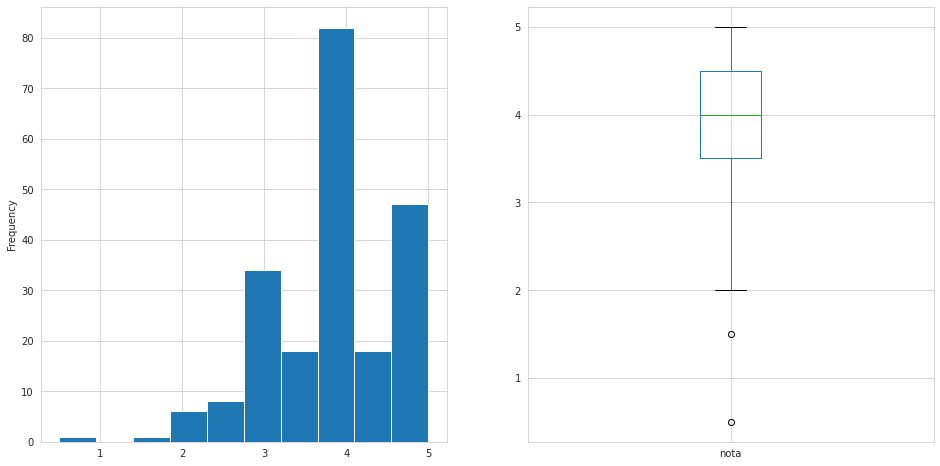

In [0]:
plt.figure(figsize=(16,8))
def plot_filme(n):
  
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  plt.subplot(1, 2, 1)
  notas_do_filme.plot(kind='hist')
  print('\n')
  plt.subplot(1, 2, 2)
  notas_do_filme.plot.box()
  return notas_do_filme.describe()

plot_filme(1)

## Desafio 7

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

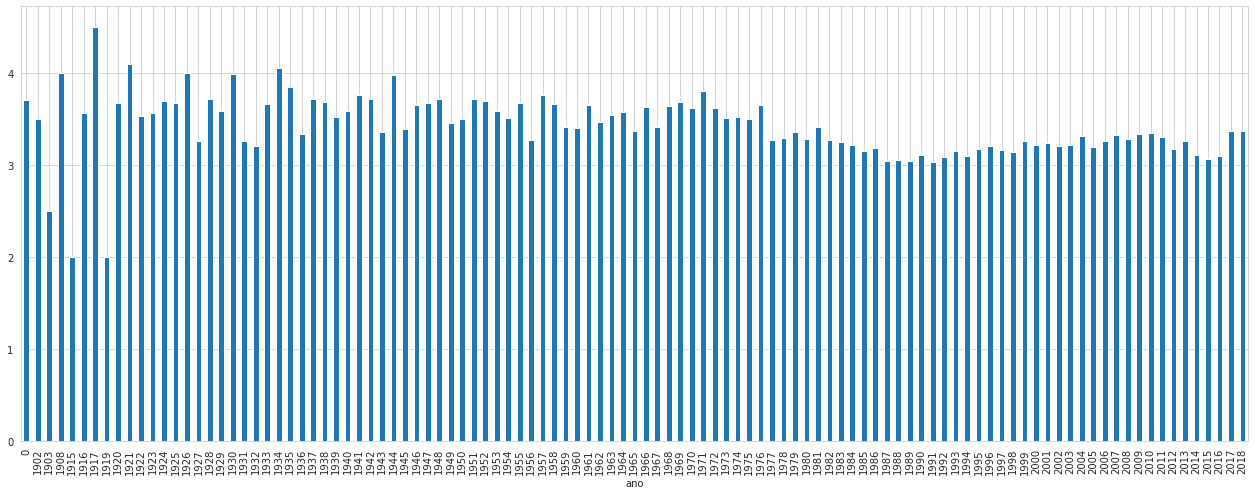

In [0]:
filmes_com_media['ano'] = filmes_com_media['titulo'].str.extract(r'\((\d\d\d\d)\)')
filmes_com_media['ano'].fillna('0', inplace=True)
filmes_notas_medias_por_ano = filmes_com_media.groupby('ano')['nota'].mean()
filmes_notas_medias_por_ano

plt.figure(figsize=(22,8))
bar = filmes_notas_medias_por_ano.plot(kind='bar')
plt.show()